# (sFigure7)-Infiltration Characteristics of Meyloid Cells in Gastric Mucosal with H. pylori Infection.

In [1]:
import anndata as ad
import scanpy as sc
import omicverse as ov


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.9, Tutorials: https://omicverse.readthedocs.io/


In [2]:
# 字体设置
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
adata = sc.read_h5ad('Gastric/Data/Gastric_anno.h5ad')
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata, adata_raw

(AnnData object with n_obs × n_vars = 63398 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
     uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     varm: 'PCs'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 63398 × 32559
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_c

In [4]:
adata_raw = adata_raw[adata.obs.index]
adata_raw.obs = adata.obs
adata_raw.uns = adata.uns
adata_raw.obsm = adata.obsm
adata_raw

AnnData object with n_obs × n_vars = 63398 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
adata = adata[adata.obs['major_celltype']=='Myeloid cell']
adata

View of AnnData object with n_obs × n_vars = 1432 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
sc.pp.neighbors(adata, use_rep="X_scVI", metric="cosine", n_neighbors=15, random_state=112)
sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)
sc.tl.umap(adata, init_pos='paga')

computing neighbors


2024-04-21 12:46:20.717801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 12:46:25.718800: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 12:46:43.938139: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:01)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

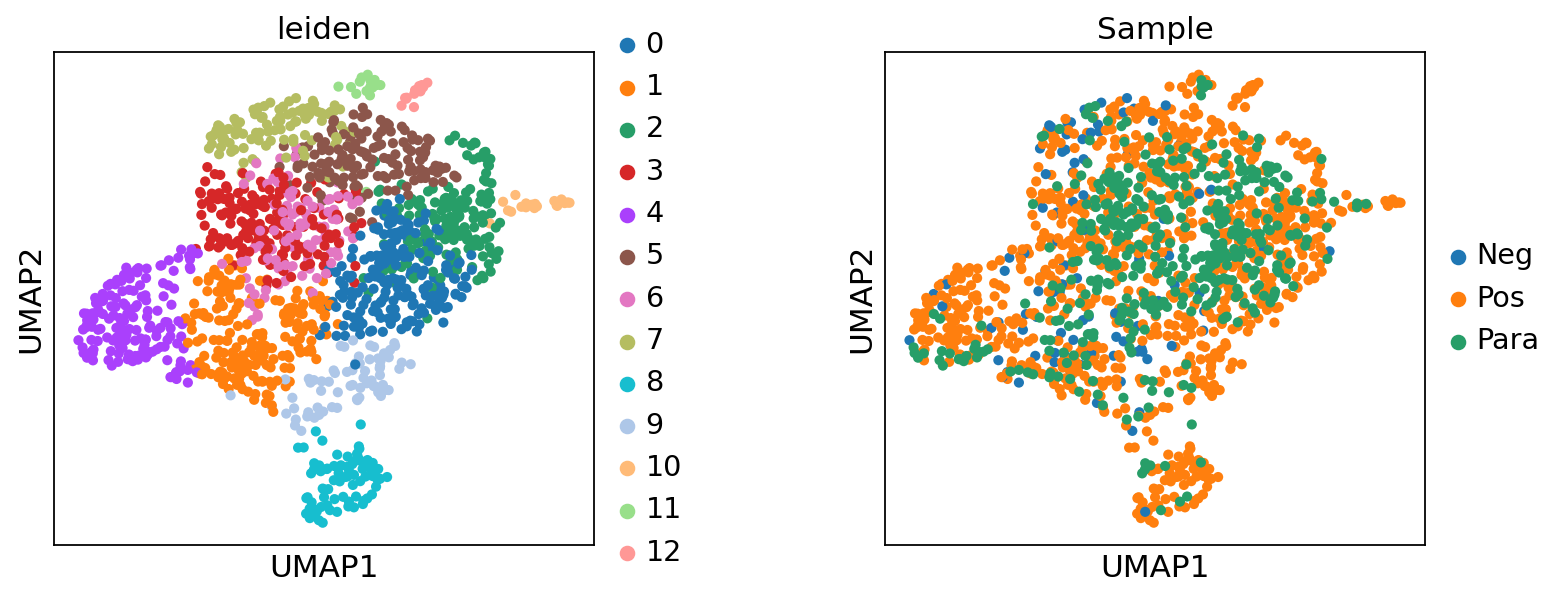

In [8]:
sc.pl.umap(adata, color=['leiden','Sample'], wspace=0.4)

In [9]:
for i in adata.obs['leiden'].cat.categories:
  number = len(adata.obs[adata.obs['leiden']==i])
  print('the number of category {} is {}'.format(i,number))

the number of category 0 is 202
the number of category 1 is 197
the number of category 2 is 165
the number of category 3 is 159
the number of category 4 is 159
the number of category 5 is 149
the number of category 6 is 100
the number of category 7 is 96
the number of category 8 is 85
the number of category 9 is 70
the number of category 10 is 20
the number of category 11 is 16
the number of category 12 is 14


In [10]:
adata = adata[adata.obs[adata.obs['leiden'].astype(int)<10].index]
adata

View of AnnData object with n_obs × n_vars = 1382 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [247]:
marker_genes_dict = {
    'Mono':['S100A8','S100A9','EREG','C5AR1','VEGFA'],
    'DC1':['CLEC9A','IRF8','CPNE3','CCND1'],
    'DC2':['CLEC10A','CD1C','CD1E','JAML','HLA-DQA1'],
    'migDC':['CCR7','LAMP3','FSCN1','CCL19'],
    'TAM1':['TNF','CCL3','CCL4','CCL4L2','CXCL3','CCL24'],
    'TAM2':['APOC1','APOE','CTSD',]}

Storing dendrogram info using `.uns['dendrogram_leiden']`
categories: 0, 1, 2, etc.
var_group_labels: Mono, DC1, DC2, etc.


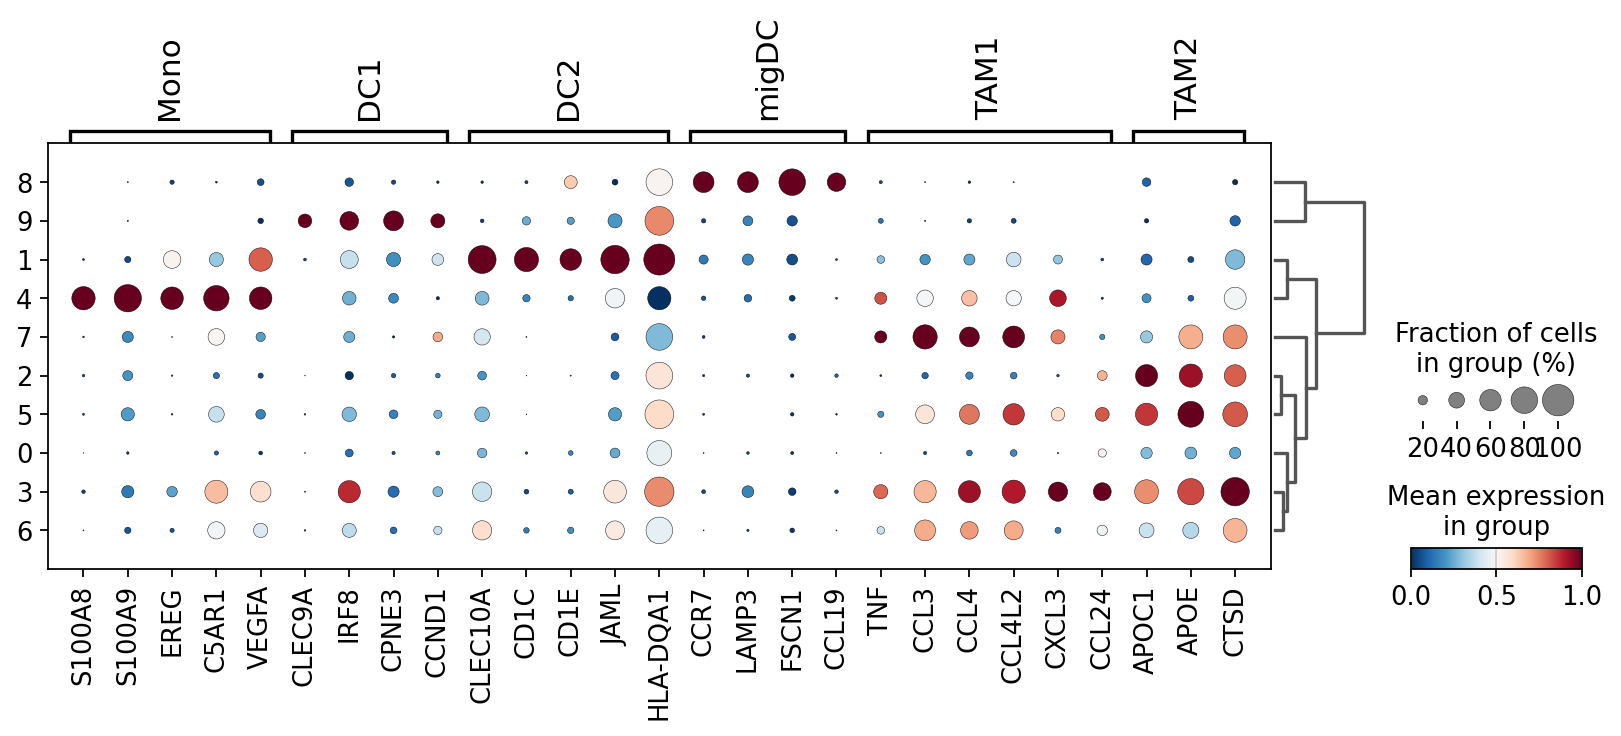

In [248]:
sc.tl.dendrogram(adata_raw,'leiden',use_rep='X_scVI')

sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby='leiden',
    dendrogram=True,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

In [249]:
cluster2annotation = {
    '0': 'TAM2',
    '1': 'DC2',
    '2': 'TAM2',
    '3': 'TAM1',
    '4': 'Monocyte',
    '5': 'TAM2',
    '6': 'TAM1',
    '7': 'TAM1',
    '8': 'migDC',
    '9': 'DC1',
}
adata.obs['Myeloid_celltype'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

In [377]:
adata.write('Gastric/Data/Gastric_Myeloid_anno.h5ad',compression='gzip')

In [391]:
adata = sc.read_h5ad('Gastric/Data/Gastric_Myeloid_anno.h5ad')
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata, adata_raw

(AnnData object with n_obs × n_vars = 1382 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Myeloid_celltype', 'Subcelltype_ID_type'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
     uns: 'Group_number_colors', 'Myeloid_celltype_colors', 'Person_colors', 'Sample_colors', 'Subcelltype_ID_type_ttest', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_Myeloid_celltype', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     varm: 'PCs'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_v

In [392]:
adata_raw = adata_raw[adata.obs.index]
adata_raw.obs = adata.obs
adata_raw.uns = adata.uns
adata_raw.obsm = adata.obsm
adata_raw

AnnData object with n_obs × n_vars = 1382 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Myeloid_celltype', 'Subcelltype_ID_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Group_number_colors', 'Myeloid_celltype_colors', 'Person_colors', 'Sample_colors', 'Subcelltype_ID_type_ttest', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_Myeloid_celltype', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [393]:
ov.pl.blue_color

['#347862',
 '#6BBBA0',
 '#81C0DD',
 '#3E8CB1',
 '#88C8D2',
 '#52B3AD',
 '#265B58',
 '#B2B0D4',
 '#5860A7',
 '#312C6C']

In [394]:
type_color_rna={
    'Monocyte':ov.pl.blue_color[8],
    'DC1':'#6A5ACD',
    'DC2':'#8A2BE2',
    'migDC':ov.pl.blue_color[7],
    'TAM1':'#483D8B',
    'TAM2':'#4169E1',
}
adata.uns['Myeloid_celltype_colors']=adata.obs['Myeloid_celltype'].cat.categories.map(type_color_rna).values.tolist()
adata_raw.uns['Myeloid_celltype_colors']=adata_raw.obs['Myeloid_celltype'].cat.categories.map(type_color_rna).values.tolist()

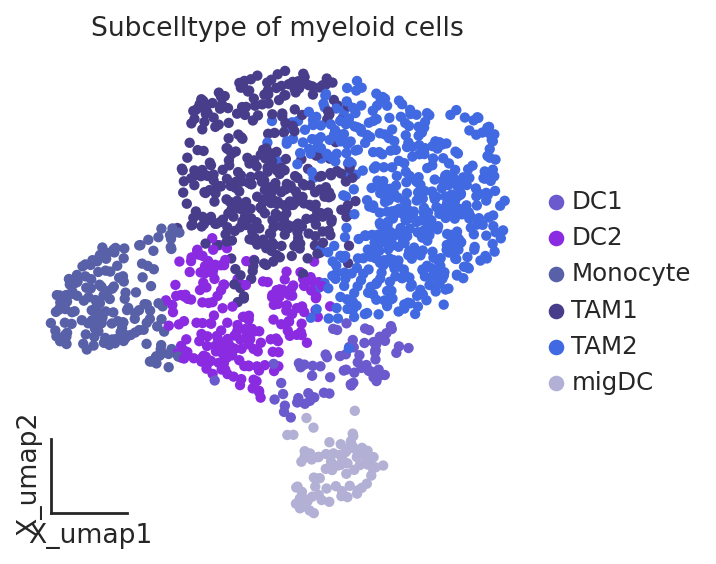

In [403]:
from matplotlib import patheffects
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ov.pl.embedding(adata,
                  basis='X_umap',
                  color=['Myeloid_celltype'],
                   show=False, add_outline=False, 
                   frameon='small',legend_fontoutline=2,ax=ax,cmap='RdBu_r'
                 )
ax.set_title('Subcelltype of myeloid cells')
plt.savefig("Gastric/Figure/sFigure7/sFigure7_A.png",dpi=300,bbox_inches = 'tight')

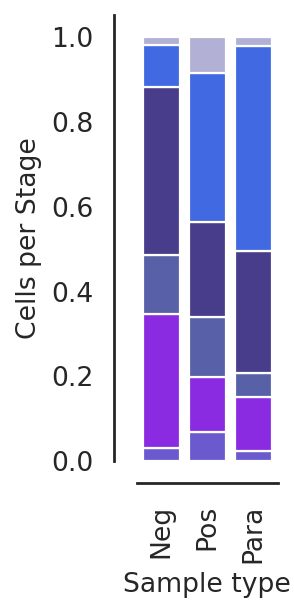

In [396]:
ax = ov.utils.plot_cellproportion(adata=adata,celltype_clusters='Myeloid_celltype',
                    visual_clusters='Sample',
                    visual_name='Sample type',figsize=(2,4))
plt.savefig("Gastric/Figure/sFigure7/sFigure7_B.png",dpi=300,bbox_inches = 'tight')

In [401]:
marker_genes_dict = {
    'DC1':['CLEC9A','IRF8','CPNE3','CCND1'],
    'DC2':['CLEC10A','CD1C','CD1E','JAML','HLA-DQA1'],
     'Mono':['S100A8','S100A9','EREG','C5AR1','VEGFA'],
    'TAM1':['TNF','CCL3','CCL4','CCL4L2','CCL24'],
    'TAM2':['APOC1','APOE','CTSD',],
'migDC':['CCR7','LAMP3','FSCN1','CCL19','IDO1','CD40'],}

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_Myeloid_celltype']`


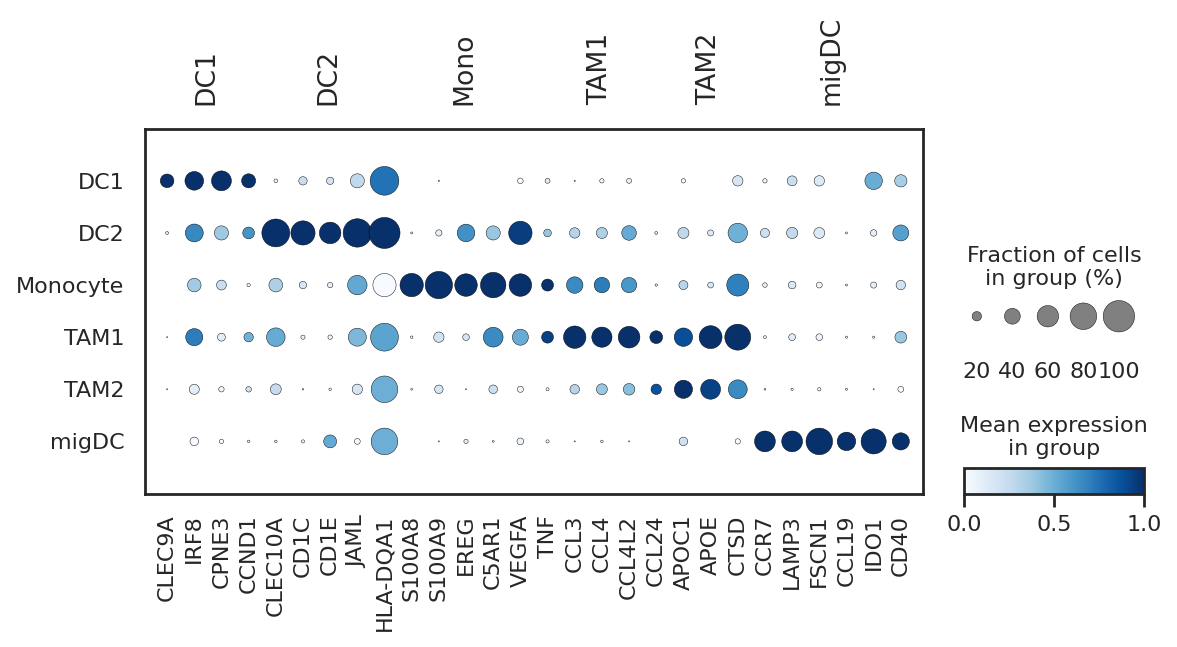

In [402]:
sc.tl.dendrogram(adata,groupby='Myeloid_celltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby='Myeloid_celltype',
    dendrogram=False,
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, # 是否需要var
    figsize=(8,3),
    return_fig=False,
    show=False,
    cmap='Blues'
)
plt.savefig("Gastric/Figure/sFigure7/sFigure7_C.png",dpi=300,bbox_inches = 'tight')

In [365]:
adata.obs['Subcelltype_ID_type'] = adata.obs['Myeloid_celltype']
meyloid = adata
meyloid

AnnData object with n_obs × n_vars = 1382 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Myeloid_celltype', 'Subcelltype_ID_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Myeloid_celltype_colors', 'Person_colors', 'Sample_colors', 'Subcelltype_ID_type_ttest', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_Myeloid_celltype', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [329]:
import anndata as ad
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata = ad.concat([adata_CD8,adata_CD4,meyloid])
adata
CD4_dict = dict(zip(adata_CD4.obs['Subcelltype_ID_type'].cat.categories, adata_CD4.uns['Subcelltype_colors']))
CD8_dict = dict(zip(adata_CD8.obs['Subcelltype_ID_type'].cat.categories, adata_CD8.uns['Subcelltype_colors']))
meyloid_dict = dict(zip(meyloid.obs['Myeloid_celltype'].cat.categories, meyloid.uns['Myeloid_celltype_colors']))
CD4_dict.update(CD8_dict)
meyloid_dict.update(CD4_dict)

label_colors = meyloid_dict
label_colors

{'DC1': '#6A5ACD',
 'DC2': '#8A2BE2',
 'Monocyte': '#5860A7',
 'TAM1': '#483D8B',
 'TAM2': '#4169E1',
 'migDC': '#B2B0D4',
 'C1.CD4.Tn': '#BCCE85',
 'C6.CD4.ADSL+.Tn': '#81B330',
 'C2.CD4.TNF+.T': '#249F3A',
 'C5.CD4.TMP1+.Tm': '#0A5D2F',
 'C4.CD4.CAPG+CREM-.Tm': '#89428F',
 'C3.CD4.CAPG+.Tm': '#c69bc6',
 'C9.CD4.IL26+.Th17': '#F2BC1D',
 'C7.CD4.IL21+.Tfh': '#6BBBDA',
 'C8.CD4.TOX2+.Tfh': '#31829F',
 'C10.CD4.LAG3+.Treg': '#D41661',
 'C11.CD4.TNFRSF9+.Treg': '#4D4F95',
 'C1.CD8.GZMK+.Tn': '#91C79D',
 'C2.CD8.GZMK+.early_Tem': '#8FC155',
 'C3.CD8.GZMK+.Tem': '#56AB56',
 'C4.CD8.CXCL13+.Termianl_Tex': '#2D5C33',
 'C5.CD8.FOS+JUN+.T-early_response': '#F0C3C3',
 'C6.CD8.FOS+IL7R+.T-early_response': '#E07370',
 'C7.CD8.ISG+.T': '#CB3E35',
 'C8.CD8.MAIT': '#A22E2A',
 'C10.CD8.ZNF683+CXCR6-.Trm': '#347862',
 'C9.CD8.ZNF683+CXCR6+.Trm': '#6BBBA0',
 'C12.CD8.ZNF683-CXCR6+.Trm': '#81C0DD',
 'C11.CD8.KLRD1+TYROBP+.NK-like': '#3E8CB1'}

In [330]:
counts = adata.obs.groupby('Group_number')['Subcelltype_ID_type'].value_counts(normalize=True).mul(100)
counts_df = counts.reset_index(name='Percentage')
counts_df

,Group_number,Subcelltype_ID_type,Percentage
0,DYM,C9.CD8.ZNF683+CXCR6+.Trm,27.900000
1,DYM,C1.CD4.Tn,8.900000
2,DYM,C10.CD8.ZNF683+CXCR6-.Trm,6.700000
3,DYM,TAM1,6.200000
4,DYM,C5.CD4.TMP1+.Tm,5.100000
...,...,...,...
314,XYM,DC2,0.681115
315,XYM,C6.CD8.FOS+IL7R+.T-early_response,0.557276
316,XYM,migDC,0.557276
317,XYM,C4.CD8.CXCL13+.Termianl_Tex,0.371517


C8.CD8.MAIT
C9.CD4.IL26+.Th17
C3.CD4.CAPG+.Tm
Monocyte
C10.CD8.ZNF683+CXCR6-.Trm
C5.CD8.FOS+JUN+.T-early_response
C7.CD8.ISG+.T
TAM2
C3.CD8.GZMK+.Tem
C11.CD8.KLRD1+TYROBP+.NK-like
TAM1
C9.CD8.ZNF683+CXCR6+.Trm
DC2
C2.CD4.TNF+.T
C12.CD8.ZNF683-CXCR6+.Trm
C4.CD4.CAPG+CREM-.Tm
C6.CD8.FOS+IL7R+.T-early_response
C5.CD4.TMP1+.Tm
migDC
C1.CD8.GZMK+.Tn
C2.CD8.GZMK+.early_Tem
C10.CD4.LAG3+.Treg
C11.CD4.TNFRSF9+.Treg
C1.CD4.Tn
C6.CD4.ADSL+.Tn
C7.CD4.IL21+.Tfh
C8.CD4.TOX2+.Tfh
C4.CD8.CXCL13+.Termianl_Tex
DC1


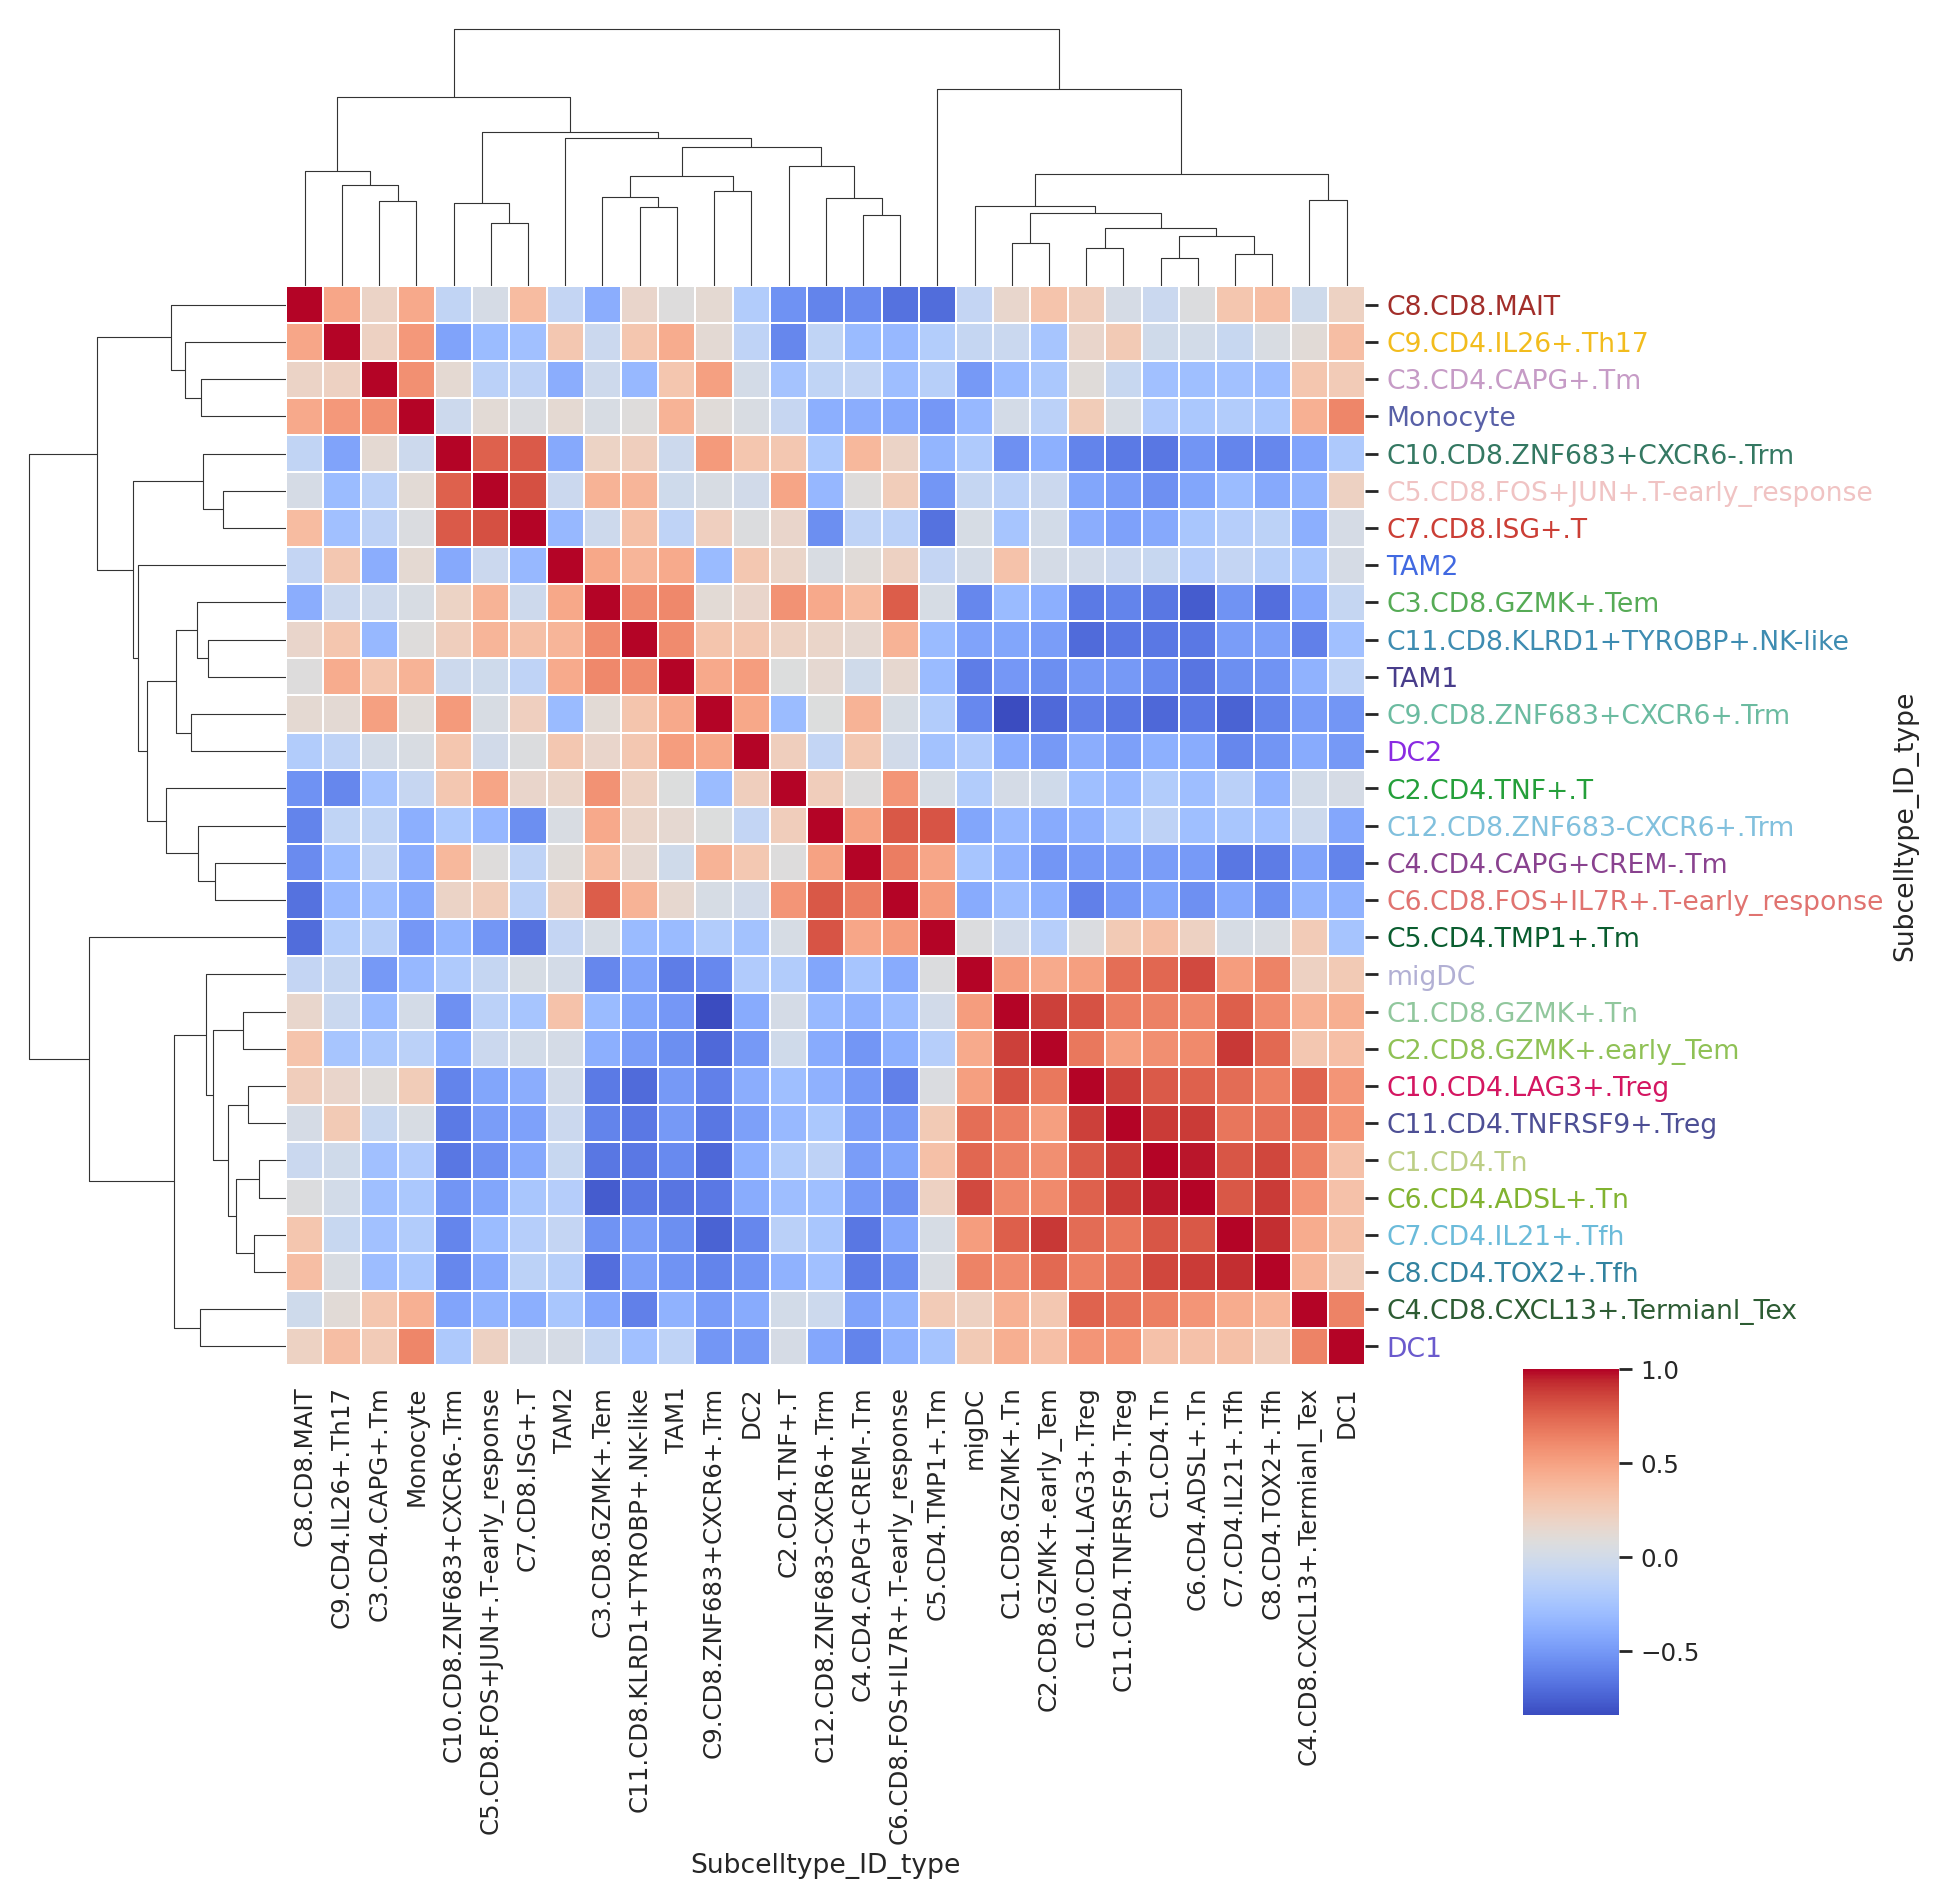

In [349]:
pivot_table = counts_df.pivot(index='Group_number', columns='Subcelltype_ID_type', values='Percentage').fillna(0)
correlation_matrix = pivot_table.corr()
import seaborn as sns
sns.set(style="white")

g = sns.clustermap(correlation_matrix, 
               method='average', 
               metric='euclidean', 
               cmap='coolwarm', 
               figsize=(12, 12),
               linewidths=.05, cbar_pos=(0.8, 0.1, 0.05, 0.18),
               annot=False)



for label in g.ax_heatmap.get_yticklabels():
    label_text = label.get_text()
    print(label_text)
    if label_text in label_colors:
        label.set_color(label_colors[label_text])
    plt.setp(g.ax_heatmap.get_yticklabels(), fontsize='12') 
plt.gca().patch.set_linewidth(0)
plt.grid(False)
plt.savefig("Gastric/Figure/sFigure7/sFigure7_D.png",dpi=300,bbox_inches = 'tight')
plt.show()

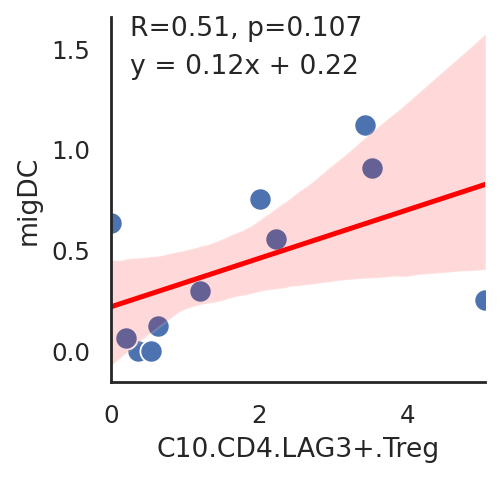

In [350]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


celltype_1 = 'C10.CD4.LAG3+.Treg'
celltype_2 = "migDC"

x = pivot_table[celltype_1]
y = pivot_table[celltype_2]

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(3, 3))  
sns.scatterplot(x=x, y=y, s=100)  

sns.regplot(x=x, y=y, scatter=False, color='red', scatter_kws={'s': 100},ci=90)

coefficients = np.polyfit(x, y, 1) 
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'

plt.text(.05, .95, f'R={r:.2f}, p={p:.3f}', transform=plt.gca().transAxes)
plt.text(.05, .90, equation, transform=plt.gca().transAxes, verticalalignment='top')

#plt.title('Scatter plot with fit line, R value and p value')
plt.xlabel(celltype_1)
plt.ylabel(celltype_2)

sns.despine()
plt.savefig("Gastric/Figure/sFigure7/sFigure7_E.png",dpi=300,bbox_inches = 'tight')

# 显示图形
plt.show()


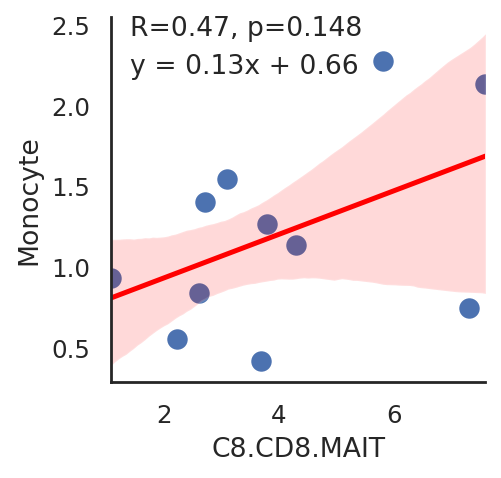

In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

celltype_1 = 'C8.CD8.MAIT'
celltype_2 = "Monocyte"

x = pivot_table[celltype_1]
y = pivot_table[celltype_2]

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(3, 3))  
sns.scatterplot(x=x, y=y, s=100)  

sns.regplot(x=x, y=y, scatter=False, color='red', scatter_kws={'s': 100},ci=90)

coefficients = np.polyfit(x, y, 1)  
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'

plt.text(.05, .95, f'R={r:.2f}, p={p:.3f}', transform=plt.gca().transAxes)
plt.text(.05, .90, equation, transform=plt.gca().transAxes, verticalalignment='top')

#plt.title('Scatter plot with fit line, R value and p value')
plt.xlabel(celltype_1)
plt.ylabel(celltype_2)

sns.despine()
plt.savefig("Gastric/Figure/sFigure7/sFigure7_F.png",dpi=300,bbox_inches = 'tight')

# 显示图形
plt.show()
